# Imports

In [1]:
# Basics
import numpy as np
import pandas as pd
import scipy.stats as stats
from pydataset import data
from scipy import math
import requests
import datetime
from datetime import datetime


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Models and Metrics
import statsmodels.api as sm

# Custom
import wrangle

# plotting defaults
plt.rc('figure', figsize=(15, 8))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = wrangle.wrangle_superstore()
df.head(3)

Saving to .csv


order_id   ship_date shipping_method customer_id  \
order_date                                                           
2014-01-04  CA-2014-112326  2014-01-08  Standard Class    PO-19195   
2014-01-04  CA-2014-112326  2014-01-08  Standard Class    PO-19195   
2014-01-04  CA-2014-112326  2014-01-08  Standard Class    PO-19195   

                segment        country        city     state  zip_code  \
order_date                                                               
2014-01-04  Home Office  United States  Naperville  Illinois   60540.0   
2014-01-04  Home Office  United States  Naperville  Illinois   60540.0   
2014-01-04  Home Office  United States  Naperville  Illinois   60540.0   

                 product id    sales  quantity  discount   profit  \
order_date                                                          
2014-01-04  OFF-LA-10003223   11.784       3.0       0.2   4.2717   
2014-01-04  OFF-BI-10004094    3.540       2.0       0.8  -5.4870   
2014-01-04  OFF-ST-10002743  272.736       3.0       0.2 -64.7748   

            category_id  region_id  \
order_date                           
2014-01-04            3          3   
2014-01-04            9          3   
2014-01-04            5          3   

                                          product name         category  \
order_date                                                                
2014-01-04                                   Avery 508  Office Supplies   
2014-01-04  GBC Standard Plastic Binding Systems Combs  Office Supplies   
2014-01-04               SAFCO Boltless Steel Shelving  Office Supplies   

           sub_category region_name  
order_date                           
2014-01-04       Labels     Central  
2014-01-04      Binders     Central  
2014-01-04      Storage     Central

In [3]:
# Verify everything looks good
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         1734 non-null   object 
 1   ship_date        1734 non-null   object 
 2   shipping_method  1734 non-null   object 
 3   customer_id      1734 non-null   object 
 4   segment          1734 non-null   object 
 5   country          1734 non-null   object 
 6   city             1734 non-null   object 
 7   state            1734 non-null   object 
 8   zip_code         1734 non-null   float64
 9   product id       1734 non-null   object 
 10  sales            1734 non-null   float64
 11  quantity         1734 non-null   float64
 12  discount         1734 non-null   float64
 13  profit           1734 non-null   float64
 14  category_id      1734 non-null   int64  
 15  region_id        1734 non-null   int64  
 16  product name     1734 non-null   object 
 

In [4]:
# Train, Validate, Test variables if needed
train = df.loc[:'2015']
validate = df.loc['2016']
test = df.loc['2017']

train.shape, validate.shape, test.shape

((712, 20), (526, 20), (496, 20))

## Look for a trends in sales for different products and see if any are becoming more popular

In [5]:
df.resample('w').sales.mean().plot()

<AxesSubplot:xlabel='order_date'>

<AxesSubplot:title={'center':'Month-to-Month Change in Sales'}, xlabel='Date By Month'>

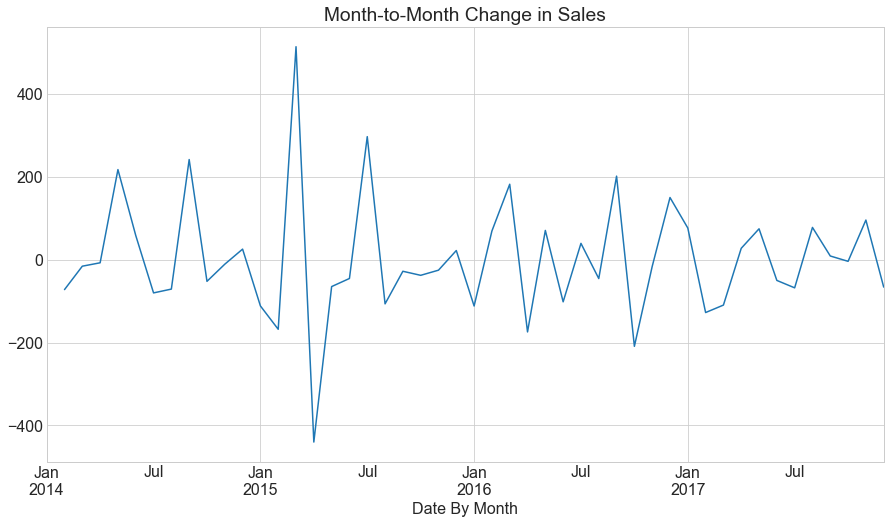

In [6]:
# Difference in sales
df.resample('M').sales.mean().diff().plot(title='Month-to-Month Change in Sales', xlabel='Date By Month')

In [7]:
df.groupby('category')['quantity'].sum().plot()
df.groupby('category')['sales'].sum().plot()
df.groupby('category')['profit'].sum().plot()
plt.legend()
plt.show()

## Possible Variables to explore

In [8]:
tech = df[df['category'] == 'Technology']
furniture = df[df['category'] == 'Furniture']
office = df[df['category'] == 'Office Supplies']

num_cols = ['profit', 'sales', 'quantity', 'discount']

In [9]:
num_df = df[num_cols]
num_df.head()

profit    sales  quantity  discount
order_date                                      
2014-01-04   4.2717   11.784       3.0       0.2
2014-01-04  -5.4870    3.540       2.0       0.8
2014-01-04 -64.7748  272.736       3.0       0.2
2014-01-09   9.7500   31.200       3.0       0.2
2014-01-09   1.1680    9.344       2.0       0.2

In [10]:
df.resample('W')['profit'].sum().plot()

<AxesSubplot:xlabel='order_date'>

<AxesSubplot:xlabel='order_date'>

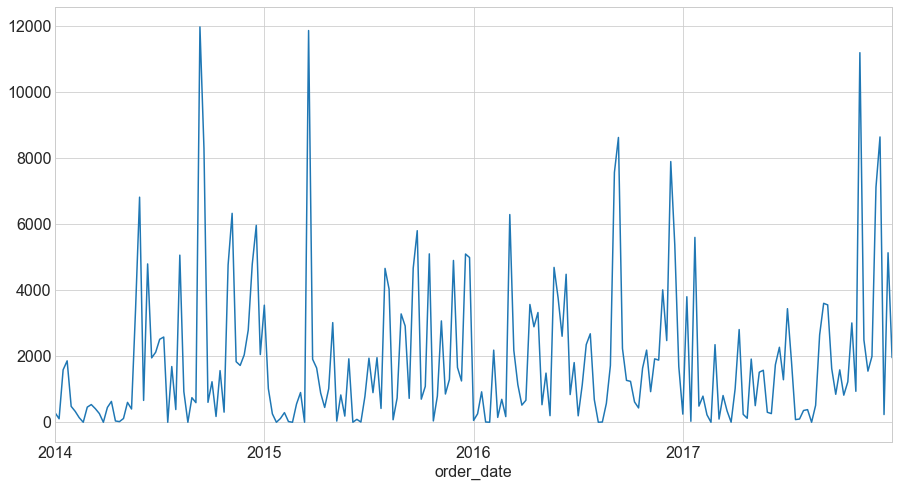

In [11]:
df.resample('W')['sales'].sum().plot()

<AxesSubplot:title={'center':'Yearly Plot'}, xlabel='order_date'>

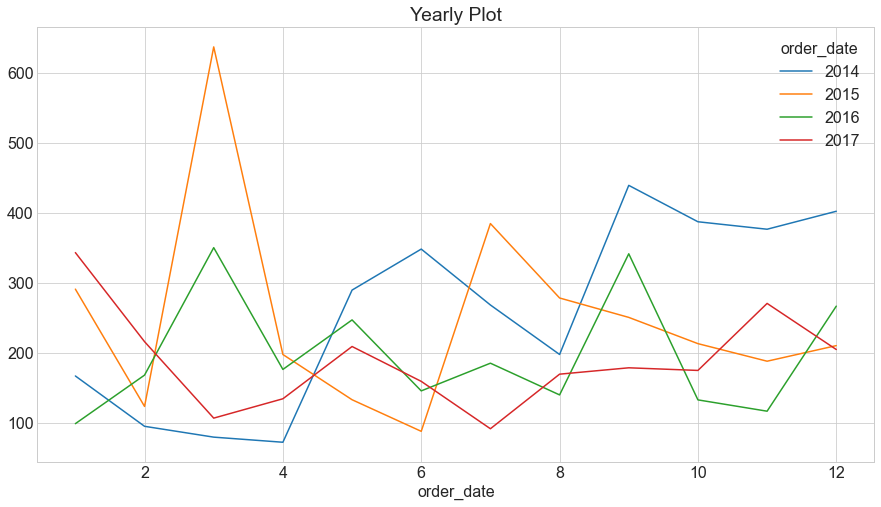

In [12]:
# Sales
df.groupby([df.index.year, df.index.month])['sales'].mean().unstack(0).plot(title='Yearly Plot')

<AxesSubplot:title={'center':'Yearly Plot'}, xlabel='order_date'>

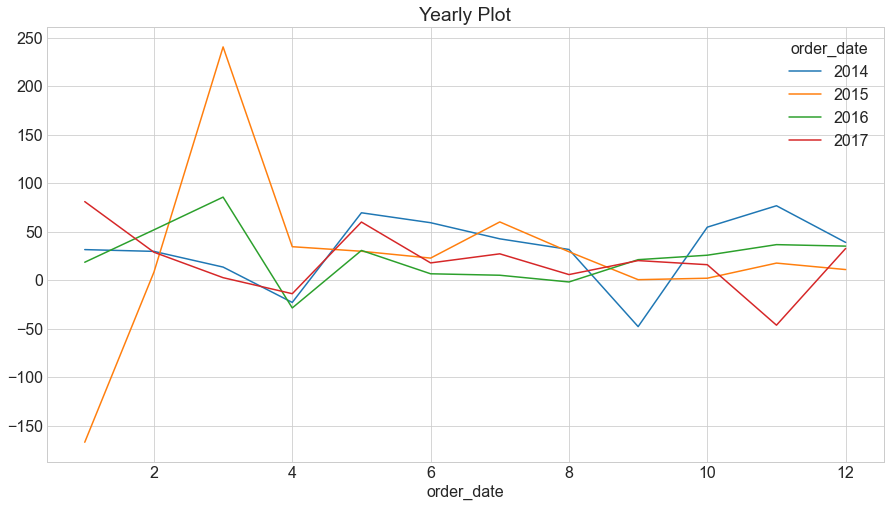

In [13]:
df.groupby([df.index.year, df.index.month])['profit'].mean().unstack(0).plot(title='Yearly Plot')

In [14]:
df.groupby([df.index.year, df.index.month])['quantity'].mean().unstack(0).plot(title='Yearly Plot')

<AxesSubplot:title={'center':'Yearly Plot'}, xlabel='order_date'>

<AxesSubplot:title={'center':'Yearly Plot'}, xlabel='order_date'>

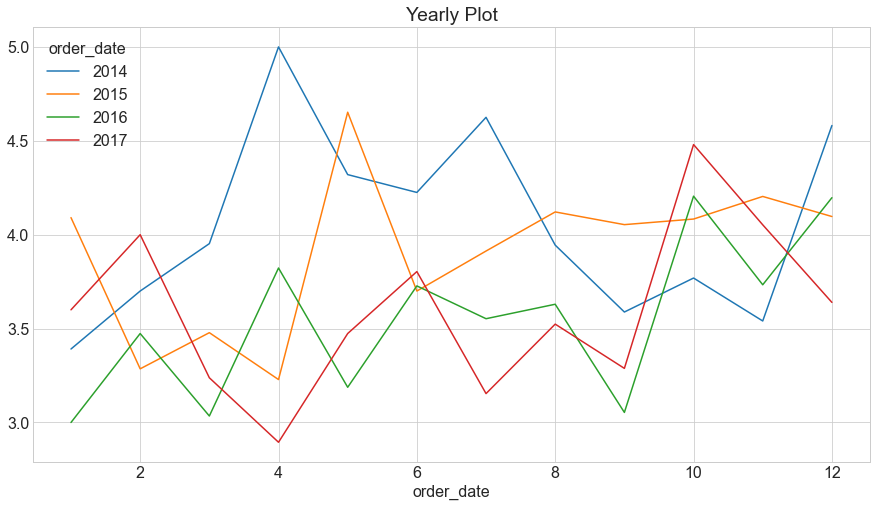

In [15]:
df.groupby([df.index.year, df.index.month])['quantity'].mean().unstack(0).plot(title='Yearly Plot')

# What item/ discount is responsible for the dip in profit for 2017?

In [17]:
df.groupby('category').resample('m').quantity.sum().unstack(0).plot()

<AxesSubplot:xlabel='order_date'>

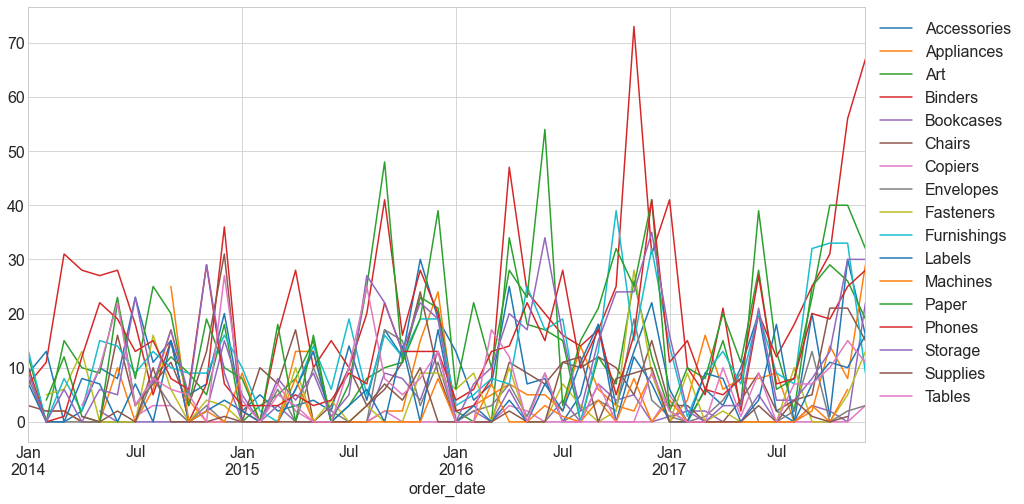

In [21]:
df.groupby('sub_category').resample('m').quantity.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

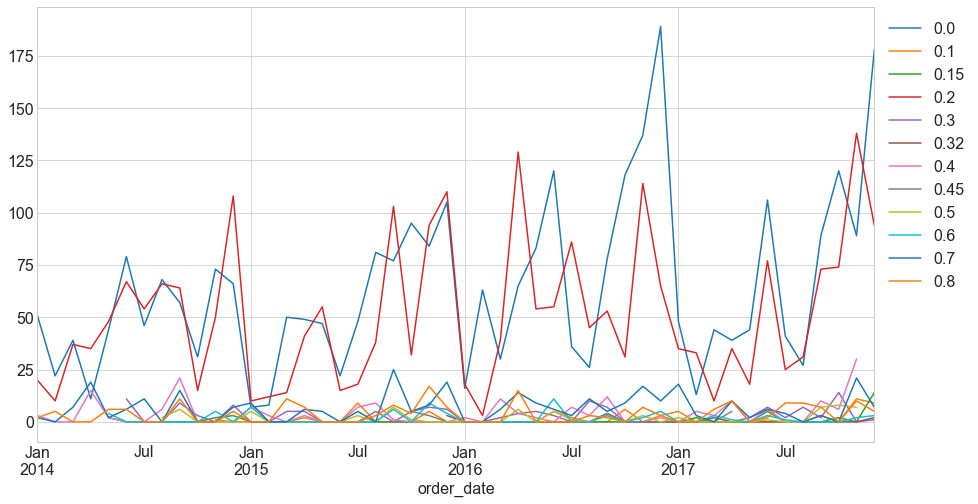

In [20]:
df.groupby('discount').resample('m').quantity.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

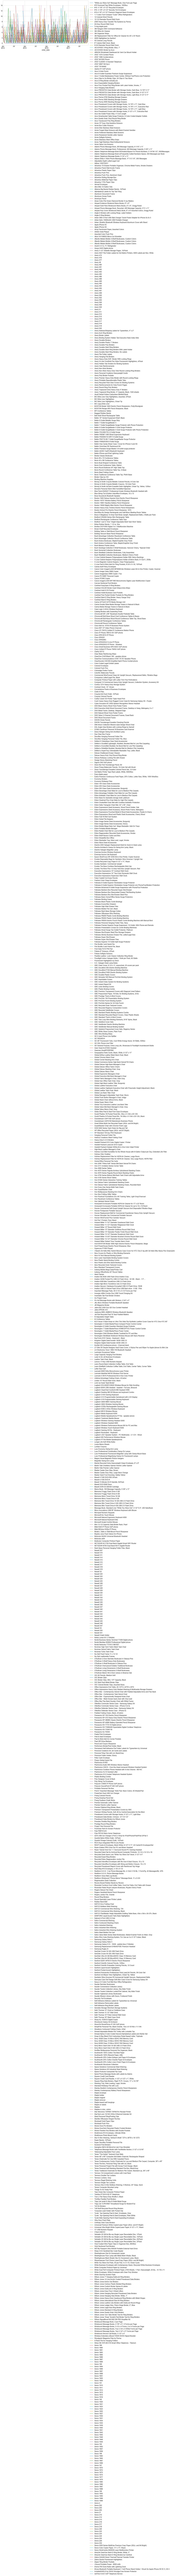

In [30]:
df.groupby('product name').resample('m').quantity.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [42]:
df['discount_bin'] = pd.qcut(df.discount, 2, labels=['low', 'high'])
df.head()

order_id   ship_date shipping_method customer_id  \
order_date                                                           
2014-01-04  CA-2014-112326  2014-01-08  Standard Class    PO-19195   
2014-01-04  CA-2014-112326  2014-01-08  Standard Class    PO-19195   
2014-01-04  CA-2014-112326  2014-01-08  Standard Class    PO-19195   
2014-01-09  CA-2014-135405  2014-01-13  Standard Class    MS-17830   
2014-01-09  CA-2014-135405  2014-01-13  Standard Class    MS-17830   

                segment        country        city     state  zip_code  \
order_date                                                               
2014-01-04  Home Office  United States  Naperville  Illinois   60540.0   
2014-01-04  Home Office  United States  Naperville  Illinois   60540.0   
2014-01-04  Home Office  United States  Naperville  Illinois   60540.0   
2014-01-09     Consumer  United States      Laredo     Texas   78041.0   
2014-01-09     Consumer  United States      Laredo     Texas   78041.0   

                 product id    sales  quantity  discount   profit  \
order_date                                                          
2014-01-04  OFF-LA-10003223   11.784       3.0       0.2   4.2717   
2014-01-04  OFF-BI-10004094    3.540       2.0       0.8  -5.4870   
2014-01-04  OFF-ST-10002743  272.736       3.0       0.2 -64.7748   
2014-01-09  TEC-AC-10001266   31.200       3.0       0.2   9.7500   
2014-01-09  OFF-AR-10004078    9.344       2.0       0.2   1.1680   

            category_id  region_id  \
order_date                           
2014-01-04            3          3   
2014-01-04            9          3   
2014-01-04            5          3   
2014-01-09           12          3   
2014-01-09            7          3   

                                          product name         category  \
order_date                                                                
2014-01-04                                   Avery 508  Office Supplies   
2014-01-04  GBC Standard Plastic Binding Systems Combs  Office Supplies   
2014-01-04               SAFCO Boltless Steel Shelving  Office Supplies   
2014-01-09             Memorex Micro Travel Drive 8 GB       Technology   
2014-01-09                                  Newell 312  Office Supplies   

           sub_category region_name discount_bin  
order_date                                        
2014-01-04       Labels     Central          low  
2014-01-04      Binders     Central         high  
2014-01-04      Storage     Central          low  
2014-01-09  Accessories     Central          low  
2014-01-09          Art     Central          low

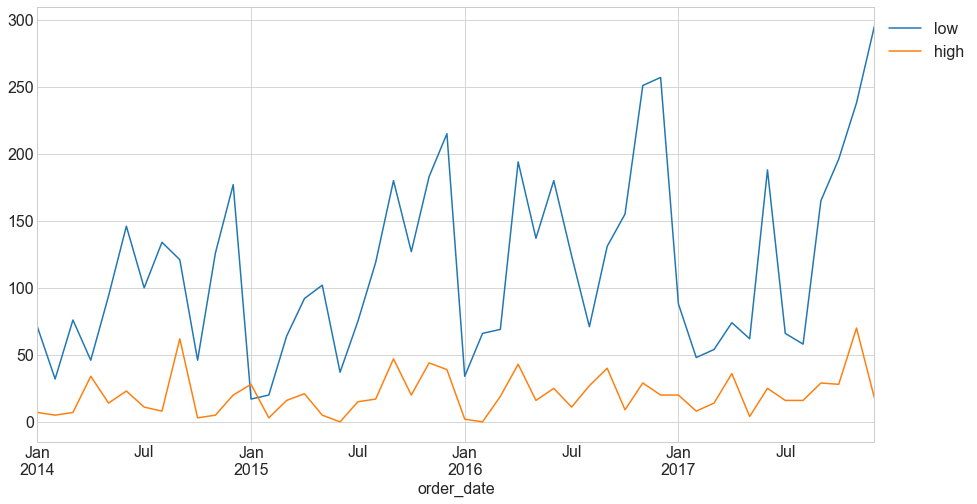

In [43]:
df.groupby('discount_bin').resample('m').quantity.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [ ]:
lambda()